# Chapter 7:  Data Science

## Ingest

*COVID-19 Data from [New York Times Github](https://github.com/nytimes/covid-19-data)*

In [1]:
import pandas as pd
df = pd.read_csv("covid19.csv")
#df.to_csv("covid19.csv", index=False)
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


Last five rows

In [2]:
df.tail()

,date,state,fips,cases,deaths
54545,2022-11-11,Virginia,51,2131894,22232
54546,2022-11-11,Washington,53,1844567,14685
54547,2022-11-11,West Virginia,54,610675,7538
54548,2022-11-11,Wisconsin,55,1909301,15522
54549,2022-11-11,Wyoming,56,179366,1917


*What are the columns?*

In [3]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

*What is the shape:  i.e. rows,columns?*

In [4]:
df.shape

(54550, 5)

## EDA

*What are general characteristics of the data?  A good way to find out is `df.describe`*

In [5]:
df.describe()

,fips,cases,deaths
count,54550.000000,5.455000e+04,54550.00000
mean,32.208964,7.656955e+05,10692.41659
std,18.772212,1.296653e+06,16101.83634
min,1.000000,1.000000e+00,0.00000
25%,17.000000,5.673500e+04,951.00000
50%,31.000000,3.008700e+05,4398.00000
75%,46.000000,9.015760e+05,13442.75000
max,78.000000,1.141172e+07,97142.00000


*Cases and Deaths in the USA due to Covid-19*

<Axes: xlabel='cases', ylabel='deaths'>

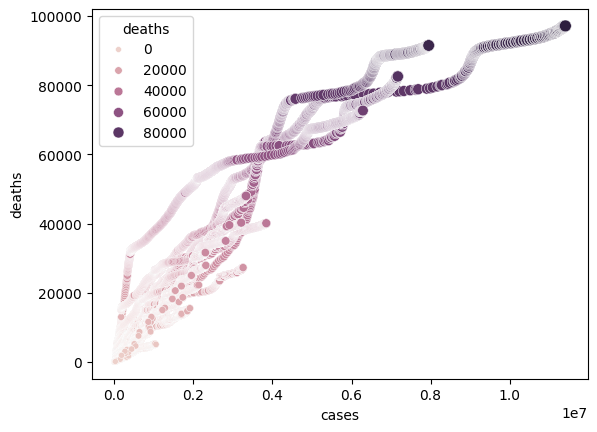

In [6]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=df)

### Date-based EDA

*Dealing with dates by setting index*

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23',
               '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23',
               '2023-03-23', '2023-03-23'],
              dtype='datetime64[ns]', name='date', length=61942, freq=None)

*Filter results by date range*

In [8]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two days ago {daybefore}") 

Today 2023-11-30
Two days ago 2023-11-28


In [9]:
# Data ends on 23/03 so need to change the dates here
daybefore = '2023-03-20'
today = '2023-03-21'
df.loc[daybefore:today].head()

,state,fips,cases,deaths
date,,,,
2023-03-20,Alabama,1,1646423,21612
2023-03-20,Alaska,2,308399,1438
2023-03-20,American Samoa,60,8320,34
2023-03-20,Arizona,4,2448406,33158
2023-03-20,Arkansas,5,1008303,13068


*The distribution of the data by date*

<Axes: xlabel='deaths', ylabel='Density'>

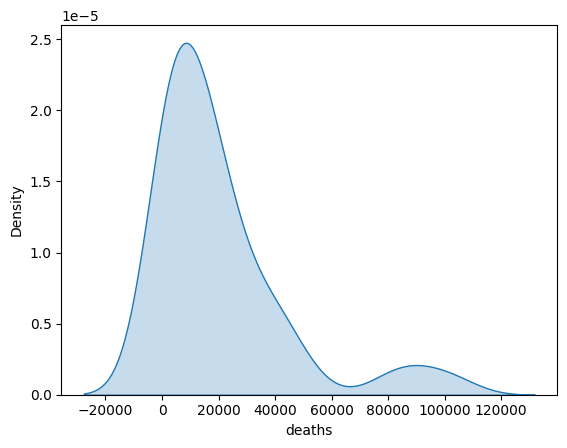

In [10]:
sns.kdeplot(df.loc[daybefore:today]["deaths"], fill=True)

*Sort DataFrame in place by states with highest deaths and cases and show first 10 results*

In [11]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2023-03-21,California,6,12154941,104185
2023-03-20,California,6,12154293,104165
2023-03-20,Texas,48,8437665,94450
2023-03-21,Texas,48,8437665,94450
2023-03-20,Florida,12,7542869,87141
2023-03-21,Florida,12,7542869,87141
2023-03-21,New York,36,6802990,79987
2023-03-20,New York,36,6801319,79984
2023-03-20,Pennsylvania,42,3533937,50599


*There should be 50 states and District of Columbia*

In [12]:
current_df.shape

(112, 4)

### State Based Analysis

*Get 10 states and subset*

In [13]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

['California',
 'California',
 'Texas',
 'Texas',
 'Florida',
 'Florida',
 'New York',
 'New York',
 'Pennsylvania',
 'Pennsylvania']

In [14]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

*Verify the unique states left is the same 10*

In [15]:
set(top_states_df.state.values)

{'California', 'Florida', 'New York', 'Pennsylvania', 'Texas'}

<Figure size 1500x500 with 0 Axes>

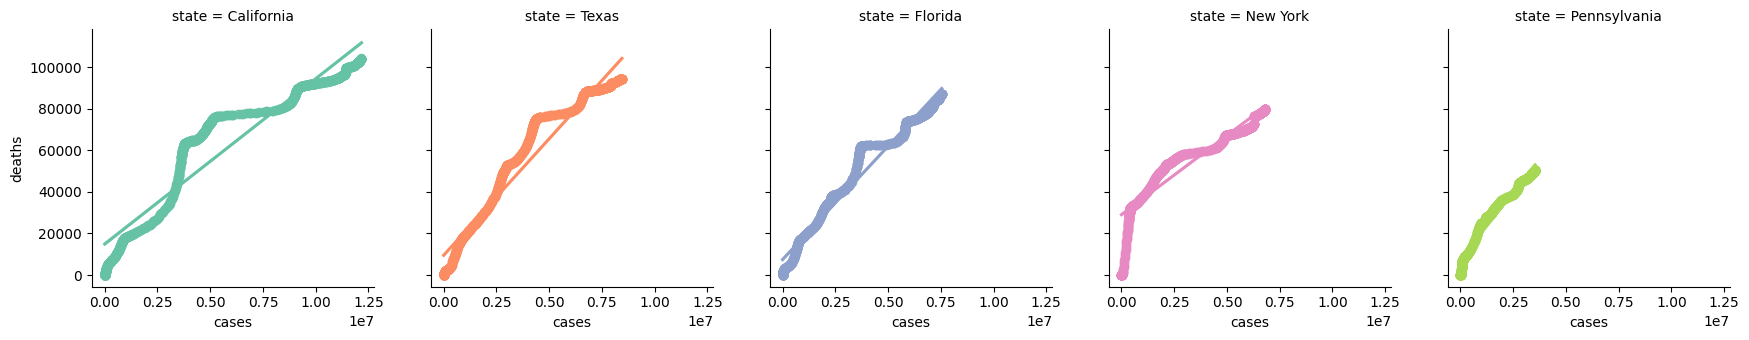

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state", 
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

*Interactive plot of top states*

In [17]:
top_states_march_current_df = top_states_df.loc["2020-03-08":today].sort_values(by=["deaths", "cases"], ascending=True)
top_states_march_current_df.head()

,state,cases,deaths
date,,,
2020-03-08,Pennsylvania,6,0
2020-03-09,Pennsylvania,10,0
2020-03-10,Pennsylvania,12,0
2020-03-11,Pennsylvania,16,0
2020-03-12,Pennsylvania,22,0


### Search for Features:  Political, Health and Finance

*Sugar Intake By State*

In [18]:
cdc_2013 = pd.read_csv("education_sugar_cdc_2003.csv")
cdc_2013.to_csv("education_sugar_cdc_2003.csv", index=False)
cdc_2013.set_index("State", inplace=True)
for column in cdc_2013.columns:
  cdc_2013[column]=cdc_2013[column].str.replace(r"\(.*\)","")
  cdc_2013[column]=pd.to_numeric(cdc_2013[column])
  
cdc_2013.reset_index(inplace=True)
cdc_2013.rename(columns={"State": "state", "Employed": "employed-sugar-intake-daily"},inplace=True)
cdc_2013.head()

C:\Users\jacob\AppData\Local\Temp\ipykernel_19372\141433166.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  cdc_2013[column]=cdc_2013[column].str.replace(r"\(.*\)","")


,state,employed-sugar-intake-daily,Not employed,Retired,<High school,High school,Some college,College graduate
0,Alaska,26.2,32.1,16.0,47.1,34.9,24.2,12.9
1,Arizona,33.0,28.7,13.8,40.4,36.5,24.4,14.6
2,California,22.9,30.2,15.0,38.5,29.9,21.4,11.5
3,Connecticut,18.9,24.3,15.0,27.8,26.9,19.9,10.2
4,District of Columbia,18.5,34.6,18.5,45.6,39.0,28.9,8.4


*Combine Sugar Data and Covid-19 Data*

In [19]:
cdc_employed_df = cdc_2013[["employed-sugar-intake-daily", "state"]]
sugar_covid_df = df.merge(cdc_employed_df, how="inner", on="state")
sugar_covid_df.head()

,state,fips,cases,deaths,employed-sugar-intake-daily
0,California,6,1,0,22.9
1,California,6,2,0,22.9
2,California,6,2,0,22.9
3,California,6,2,0,22.9
4,California,6,2,0,22.9


*What about data from the 2016 Election?*

In [20]:
election_df = pd.read_csv("2016-Electoral-Votes.csv")
#election_df.to_csv("2016-Electoral-Votes.csv", index=False)
election_df.rename(columns={"State": "state"},inplace=True)
election_df.drop(columns="Votes", inplace=True)
election_df = pd.concat([election_df, pd.get_dummies(election_df["Winning Party"])], axis=1);
election_df.head()
#election_df["Republican?"] = pd.get_dummies(election_df, columns=["Winning Party"])
#election_df.head()

,state,Winning Party,Democrats,Republicans
0,Alabama,Republicans,0,1
1,Alaska,Republicans,0,1
2,Arizona,Republicans,0,1
3,Arkansas,Republicans,0,1
4,California,Democrats,1,0


In [21]:
sugar_covid_df = sugar_covid_df.merge(election_df, how="inner", on="state")
sugar_covid_df.head()

,state,fips,cases,deaths,employed-sugar-intake-daily,Winning Party,Democrats,Republicans
0,California,6,1,0,22.9,Democrats,1,0
1,California,6,2,0,22.9,Democrats,1,0
2,California,6,2,0,22.9,Democrats,1,0
3,California,6,2,0,22.9,Democrats,1,0
4,California,6,2,0,22.9,Democrats,1,0


*Generate Heatmap*

In [22]:
sugar_covid_df.corr()

C:\Users\jacob\AppData\Local\Temp\ipykernel_19372\1343867003.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sugar_covid_df.corr()


,fips,cases,deaths,employed-sugar-intake-daily,Democrats,Republicans
fips,1.000000,-0.120943,-0.127549,0.269999,-0.187330,0.187330
cases,-0.120943,1.000000,0.935557,-0.124204,0.221498,-0.221498
deaths,-0.127549,0.935557,1.000000,-0.161596,0.299948,-0.299948
employed-sugar-intake-daily,0.269999,-0.124204,-0.161596,1.000000,-0.767539,0.767539
Democrats,-0.187330,0.221498,0.299948,-0.767539,1.000000,-1.000000
Republicans,0.187330,-0.221498,-0.299948,0.767539,-1.000000,1.000000


In [23]:
sugar_covid_df.to_csv("covid-eda.csv")

C:\Users\jacob\AppData\Local\Temp\ipykernel_19372\3816528014.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(sugar_covid_df.corr(), annot=True)


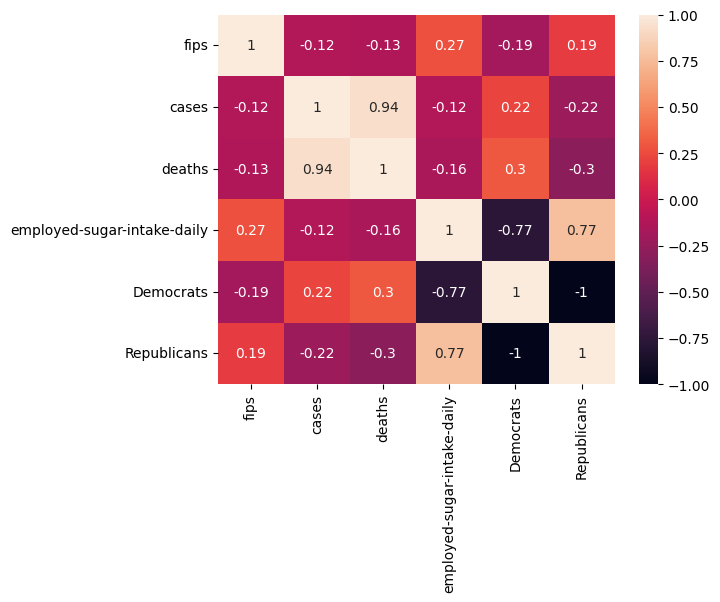

In [24]:
dataplot = sns.heatmap(sugar_covid_df.corr(), annot=True)

## Modeling

<Axes: xlabel='fips', ylabel='employed-sugar-intake-daily'>

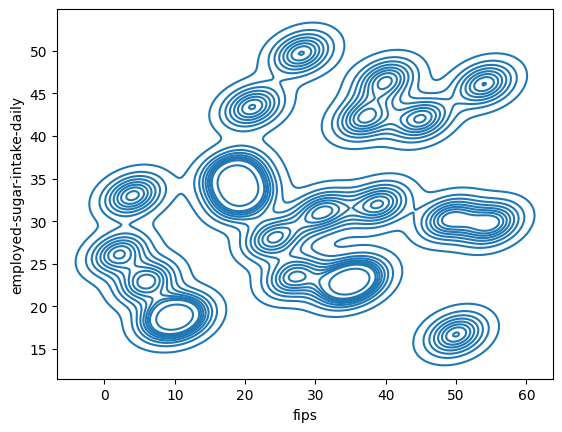

In [40]:
sns.kdeplot(sugar_covid_df, x='fips', y='employed-sugar-intake-daily')

<Axes: xlabel='Democrats', ylabel='employed-sugar-intake-daily'>

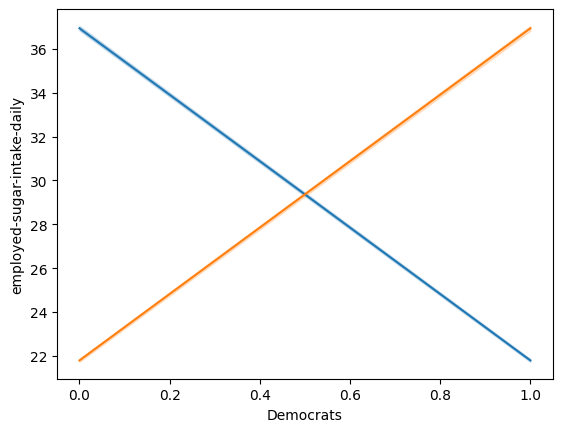

In [38]:
sns.lineplot(sugar_covid_df, x='Democrats', y='employed-sugar-intake-daily')
sns.lineplot(sugar_covid_df, x='Republicans', y='employed-sugar-intake-daily')
sns.set


## Conclusion


Deaths are, unsurprisingly highly correlated with cases.

Republican states have a positive correlation with sugar intake, and Democrats are negatively correlated.

array([[<Axes: xlabel='employed-sugar-intake-daily', ylabel='employed-sugar-intake-daily'>,
        <Axes: xlabel='fips', ylabel='employed-sugar-intake-daily'>,
        <Axes: xlabel='Democrats', ylabel='employed-sugar-intake-daily'>,
        <Axes: xlabel='Republicans', ylabel='employed-sugar-intake-daily'>],
       [<Axes: xlabel='employed-sugar-intake-daily', ylabel='fips'>,
        <Axes: xlabel='fips', ylabel='fips'>,
        <Axes: xlabel='Democrats', ylabel='fips'>,
        <Axes: xlabel='Republicans', ylabel='fips'>],
       [<Axes: xlabel='employed-sugar-intake-daily', ylabel='Democrats'>,
        <Axes: xlabel='fips', ylabel='Democrats'>,
        <Axes: xlabel='Democrats', ylabel='Democrats'>,
        <Axes: xlabel='Republicans', ylabel='Democrats'>],
       [<Axes: xlabel='employed-sugar-intake-daily', ylabel='Republicans'>,
        <Axes: xlabel='fips', ylabel='Republicans'>,
        <Axes: xlabel='Democrats', ylabel='Republicans'>,
        <Axes: xlabel='Republicans', ylab

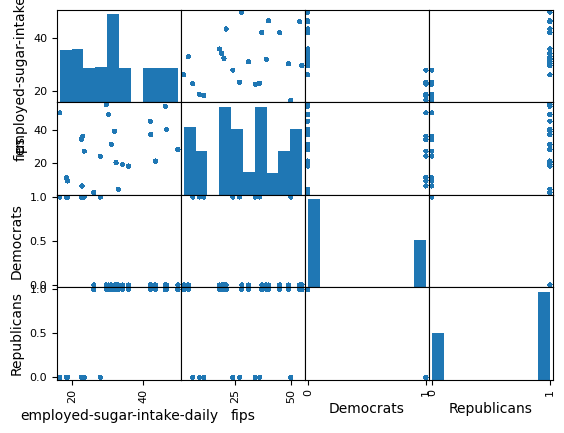

In [28]:
pd.plotting.scatter_matrix(sugar_covid_df[['employed-sugar-intake-daily', 'fips', 'Democrats', 'Republicans']])